<a href="https://colab.research.google.com/github/Unagui19/Proyecto-Computacion-Cientifica-2025/blob/main/proyect_diabetes_simple_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Datos sobre Diabetes

Análisis exploratorio de datos de salud relacionados con diabetes

In [ ]:
#Montamos el Drive para poder leer el archivo
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1. Importar Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar formato de decimales
pd.options.display.float_format = "{:.2f}".format

## 2. Cargar Datos

In [ ]:
# Cargar dataset
df = pd.read_csv("/content/drive/MyDrive/ProyectoMN2-2/diabetes_prediction_dataset.csv")
#df = pd.read_csv("/content/drive/MyDrive/Proyecto/diabetes_prediction_dataset.csv")

# print(f"Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")

In [ ]:
# Ver primeras filas
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


Explicacion de los datos del dataset


*   **Gender**: Indica el sexo de la persona: Male, Female, Other. El Genero no es un predictor directo de diabetes si pueden influir en estilo de vida, facotres hormonales, etc. Permite comparar tasas de diabetes entre generos, detectar desigualdades o patrones diferentes.
*   **Age**: Representa la edad de cada paciente, la edad es uno de los principales facotres de riesgo para la diabetes.
*   **Hypertension**: Indica si la persona sufre presion arterial alta, agrega un riesgo extra que suele ir de la mano con la diabetes
*   **Heart_disease**: Indica si la persona tienme una condicion cardiaca. la diabetes aumenta significativamente el riesgo de infrtos, insuficiencia cardiaca, etc.
*   **Smoking_history**: Categoria que clasifica que tanto fuma una persona. Podemos analizar la relacion entre tabaquismo y diabetes, comparar riesgo entre fumadores y no fumadores.
*   **BMI**: es el indice de masa corporal. Relacion entre peso y altura. El sobrepeso y la obesidad son los principales factores de riesgo modificables de la diabetes tipo 2
*   **HbA1c_level**: Mide el nivel promedio de glucosa en sangre durante los ultimos 2-3 meses.Es el metodo estandar para diagnosticar diabetes.
*   **Blood_glucose_level**: Medicion de glucosa en ese momento, es un valor instantaneo. un valor alto puede indicar diabetes, resistencia a la insulina, alimentacion reciente.
*   **Diabetes**: Es la variable que queremos analizar o predecir.

Todo el analisis se enfoca en entender que factores aumenta su probabilidad, como se distribuye, que variables estan más asociadas a ella.


Juntas permiten:
* identificar patrones
* entender relaciones
* comparar grupos
* Construir modelos predictivos


## 3. Calidad de Datos

### 3.1. Duplicados

Busca filas que sean exactamente igual a otras, las suma y las elimina.
La funcion principal aqui es evitar el sesgo, es decir evitar que los resultados, decisiones estan inclinados hacia una parte, por un error o desequilibrio en los datos.


In [ ]:
# Manejar duplicados
filas_duplicadas = df[df.duplicated()]
print(f"Número de filas duplicadas: {filas_duplicadas.shape[0]}")

Número de filas duplicadas: 3854


In [ ]:
# Eliminar duplicados
df = df.drop_duplicates()
print(f"Filas después de eliminar duplicados: {df.shape[0]}")

Filas después de eliminar duplicados: 96146


### 3.2. Valores únicos por columna

Revisamos columna por columna y contamos cuantas opciones diferentes existen.
Verificamos que no haya datos "basura"

In [ ]:
# Contar valores distintos por columna
for columna in df.columns:
    num_valores = len(df[columna].unique())
    print(f"{columna}: {num_valores} valores distintos")

gender: 3 valores distintos
age: 102 valores distintos
hypertension: 2 valores distintos
heart_disease: 2 valores distintos
smoking_history: 6 valores distintos
bmi: 4247 valores distintos
HbA1c_level: 18 valores distintos
blood_glucose_level: 18 valores distintos
diabetes: 2 valores distintos


### 3.3. Valores nulos

Buscamos celdas nulas en todo el archivo, sumamos cuantas celdas vacias hay por columna.
Realizamos esto para detectar algun error. Si es que alguna columna devuelve un valor distinto de cero debemos decidir que hacer con esos pacientes.

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Realizamos una limpieza de genero de other, eliminamos las filas del genero other, proposito simplificar el modelo. Como la cantidad de other es poquita, es mejor quitarlos para que el modelo se enfoque en patrones generales.

In [ ]:
# Eliminar categoría 'Other' en género (muy pocos casos, 0.002%)
df = df[df['gender'] != 'Other']
print(f"Filas después de limpiar género: {df.shape[0]}")

Filas después de limpiar género: 96128


### 3.4. Estadísticas descriptivas

el codigo **df.decribe()** genera una tabla resumen.

* **mean**: promedio
* **std**: desviacion estandar (que tan dispersos estan los datos de una sola columna con respecto a su promedio)
* Min/Max: el valor mas bajo y el mas alto encontrado.
* 25% (primer cuartil o Q1)
* 50% (segundo cuartil o Q2, mediana)
* 75% (tercer cuartil o Q3)

**Aclaracion** un cuartil es, en esencia una frontera o un punto de corte.


In [ ]:
# Resumen estadístico
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


## 4. Análisis Univariado

Hacemos este análisis para revisar cada variable por separado antes de empezar. Es fundamental porque nos permite encontrar errores en los datos, entender qué tipo de pacientes tenemos (como su edad o peso) y confirmar cuántos casos reales de diabetes hay. Así aseguramos que la información esté limpia y tenga sentido antes de intentar hacer predicciones.

### 4.1. Distribución de edad

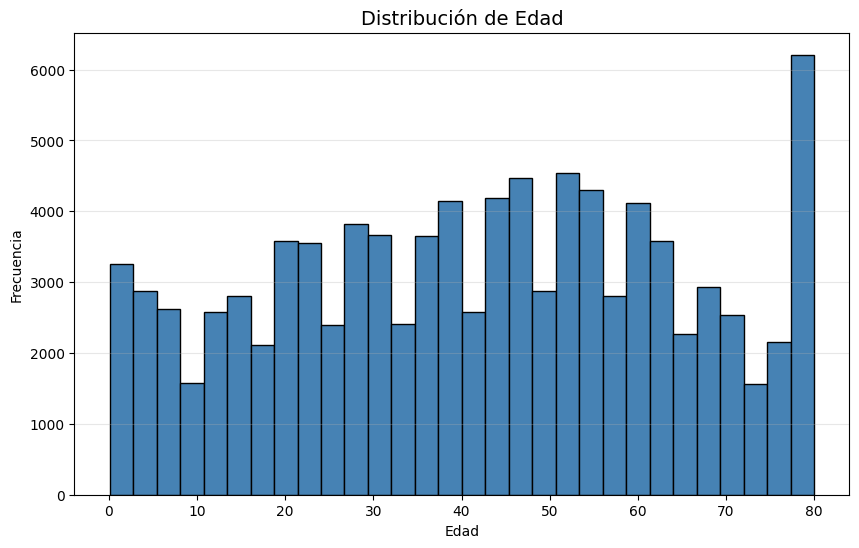

In [ ]:
# Histograma de edad
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, edgecolor='black', color='steelblue') #Dibuja las barras
plt.title('Distribución de Edad', fontsize=14)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.show()

**Del grafico observamos lo siguiente:**

* Las Edades van desde 0 hasta 80, es decir incluye persons de todas las etapas de vida
* Hay una mayor concentracion de personas adultas
* Hay un pico alrededor de los 80, lo cual indica que hay un grupo relativamente grande de personas de esas edad.
* No es una distribucion normal, tiende a ser heterogenea y dispersa.


### 4.2. Distribución de género

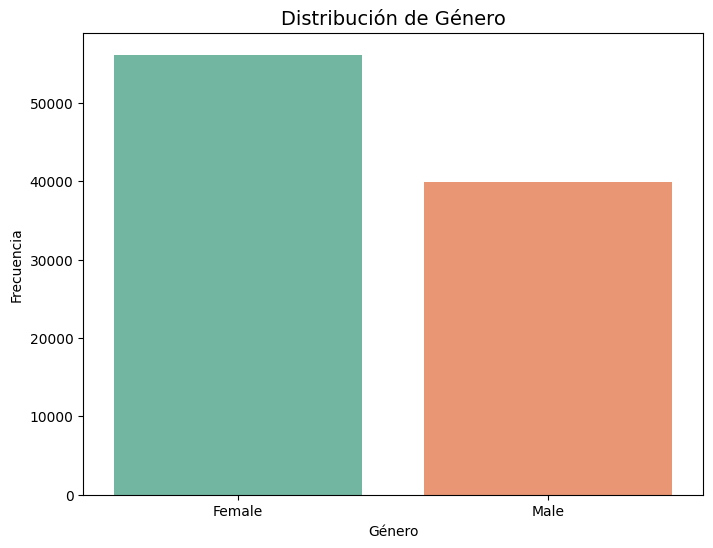

In [ ]:
# Gráfico de barras para género
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Distribución de Género', fontsize=14)
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

El grupo 'Female' tiene una frecuencia mayor que el grupo 'Male'.
La diferencia entre ambos generos es considerable, lo que implica que el dataset esta desbalanceado, aunque no de manera extrema.

**Conclusion**: la poblacion del dataset no es equitativa en terminos de genero, con una presencia mas alta del genera femenino.

**HAY QUE BALANCEAR LOS DATOS AQUI??**

### 4.3. Distribución de IMC (BMI)

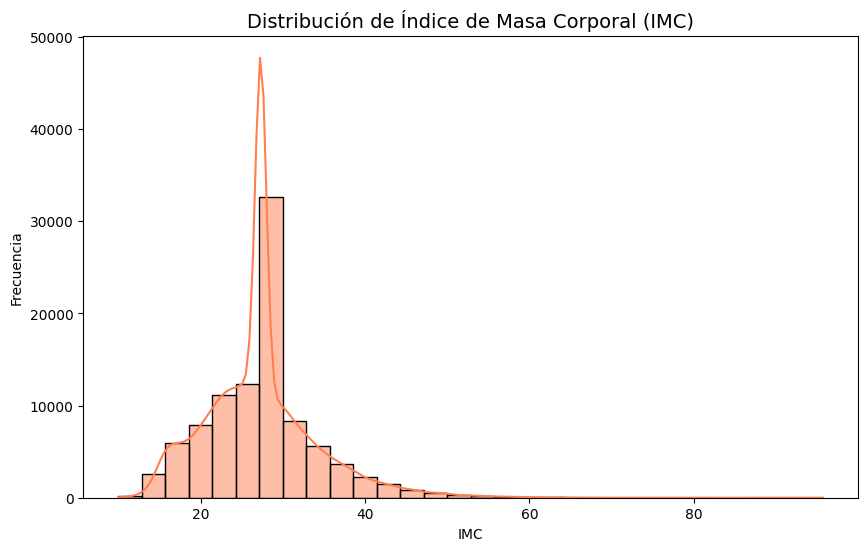

In [ ]:
# Gráfico de distribución para IMC
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True, color='coral')
plt.title('Distribución de Índice de Masa Corporal (IMC)', fontsize=14)
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de las personas tiene un IMC entre 20 y 35, lo que coincide con:

* IMC normal: 18.5–24.9
* Sobrepeso: 25–29.9
* Obesidad grado I: 30–34.9

La mayoria de las personas tienen un IMC entre 20 y 35, concentrandose al rededor de los 30's , lo que indica una fuerte presencia de sobrepeso en la poblacion

**ANALIZAR SI HAY PRESENCIA DE OUTLINDERS**

### 4.4. Variables binarias (Hipertensión, Enfermedad Cardíaca, Diabetes)

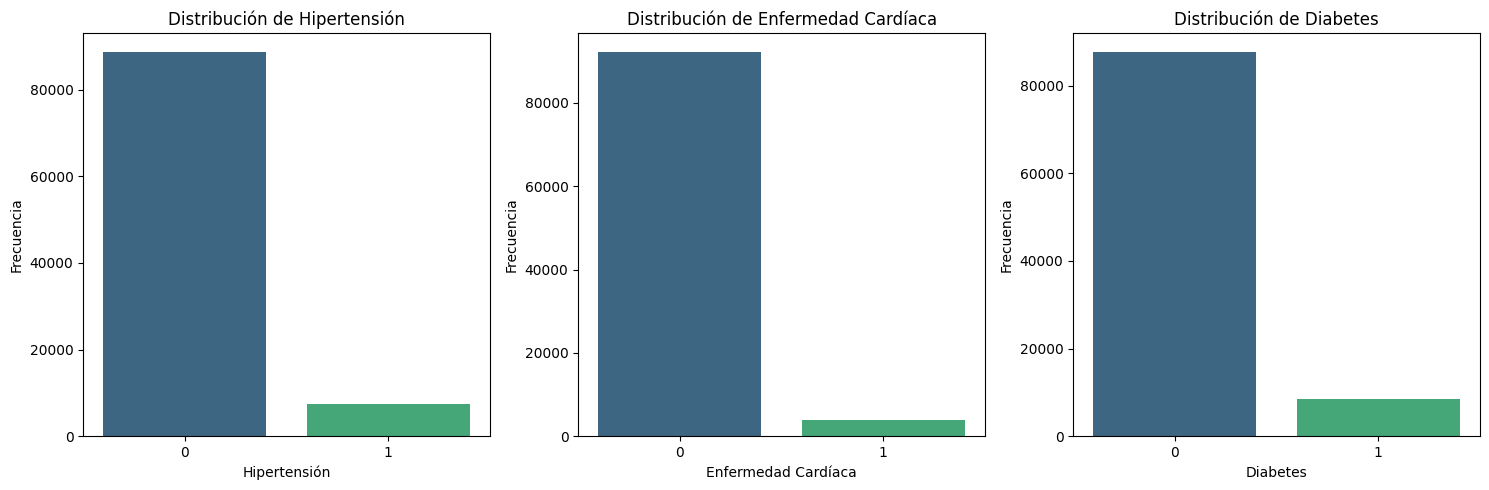

In [ ]:
# Gráficos de conteo para variables binarias
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
variables_binarias = ['hypertension', 'heart_disease', 'diabetes']
titulos = ['Hipertensión', 'Enfermedad Cardíaca', 'Diabetes']

for i, (var, titulo) in enumerate(zip(variables_binarias, titulos)):
    sns.countplot(data=df, x=var, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribución de {titulo}', fontsize=12)
    axes[i].set_xlabel(titulo)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

La mayoría de las personas del dataset no tiene hipertensión, enfermedad cardíaca ni diabetes. Los casos “positivos” (los que sí tienen estas enfermedades) son pocos. En especial en la variable Diabetes, donde solo alrededor del 9% tiene la enfermedad.

### 4.5. Historial de fumadores

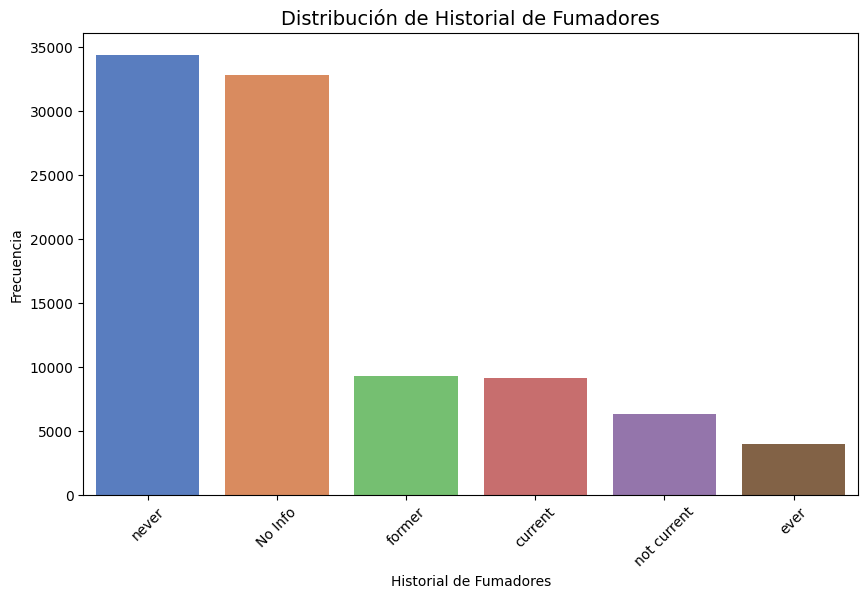

In [ ]:
# Gráfico de barras para historial de fumadores
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_history', palette='muted', order=df['smoking_history'].value_counts().index)
plt.title('Distribución de Historial de Fumadores', fontsize=14)
plt.xlabel('Historial de Fumadores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

El análisis de esta variable muestra dos problemas principales. Primero, hay una gran cantidad de datos faltantes, ya que cerca del 35% de los pacientes aparecen como 'No Info'. Segundo, existen demasiadas categorías para los ex-fumadores (former, not current, ever) que significan casi lo mismo.

## 5. Análisis Bivariado

Implementamos el analisis bivariado para estudiar como se relaciona cada variable del dataset con la variable objeto. su finalida es ver que tanto aporta cada dato a la hora de predecir la enfermedad.

Realizar un analisis bivariado nos permite:
* Ver si factores de riesgo conocidos, realmente estan asociados con la diabetes dentro de conjunto de datos


### 5.1. IMC vs Diabetes

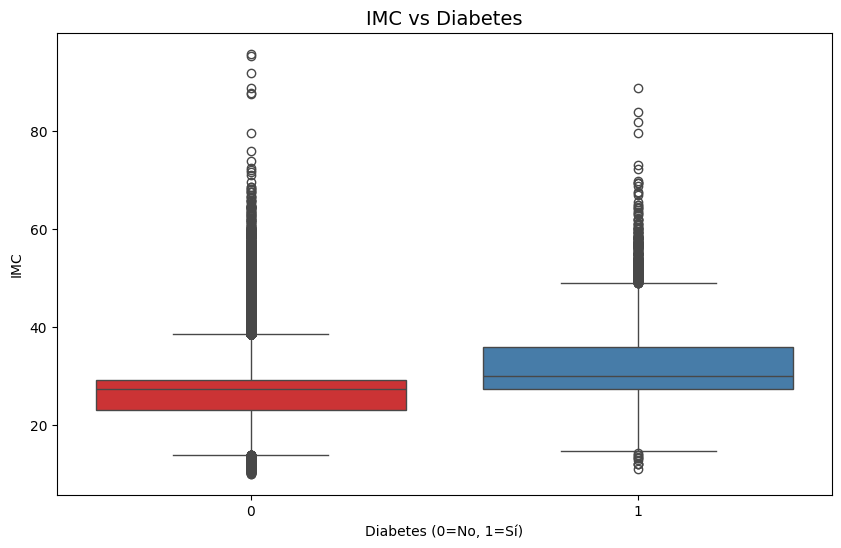

In [ ]:
# Boxplot: IMC vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes', y='bmi', palette='Set1')
plt.title('IMC vs Diabetes', fontsize=14)
plt.xlabel('Diabetes (0=No, 1=Sí)')
plt.ylabel('IMC')
plt.show()

**Explicacion**: La caja central representa el rango intercuartilico, la linea dentro de la caja representa la mediana del imc. los puntos por fuera son **outliers**, es decir valores que se alejan significativamente del resto.

Del grafico podemos observar que la mediana es mas alta en diabeticos, lo que significa que los diabeticos tienden a tener un IMC mas alto.
Conclusion --> El grafico muestra una correlacion entre el IMC alto y diabetes (esto ya lo teniamos presente, ya que de por si el sobrepeso u obesidad puede estar asociado con mayor riesgo de desarrollar diabetes)




### 5.2. Edad vs Diabetes

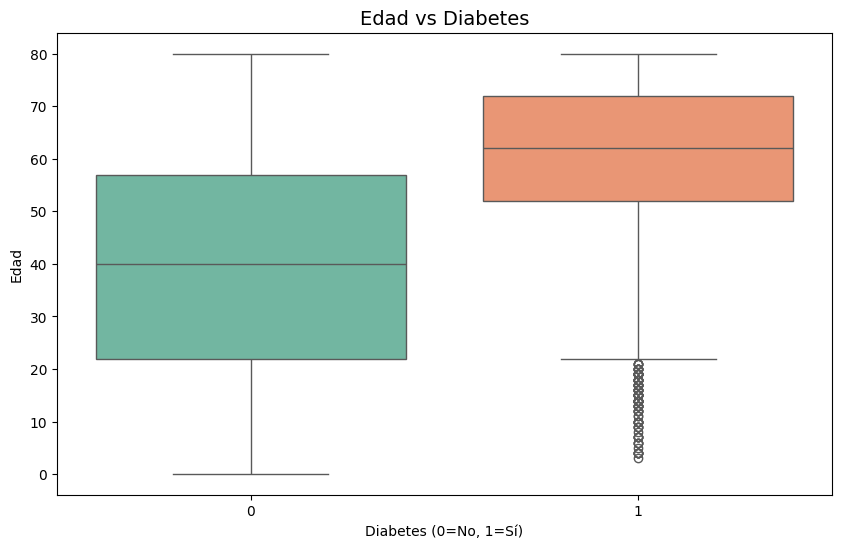

In [ ]:
# Boxplot: Edad vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes', y='age', palette='Set2')
plt.title('Edad vs Diabetes', fontsize=14)
plt.xlabel('Diabetes (0=No, 1=Sí)')
plt.ylabel('Edad')
plt.show()

En el gráfico se ve que la mediana de edad es mucho mayor en personas con diabetes (alrededor de 62 años) que en las que no la tienen (cerca de 40). Además, la mayoría de los casos positivos se concentran entre los 50 y 75 años, aunque aparecen algunos casos aislados en edades muy bajas.

Conclusión → Existe una relación clara entre mayor edad y diabetes, ya que las personas diabéticas tienden a ser notablemente mayores que las no diabéticas.

### 5.3. Género vs Diabetes

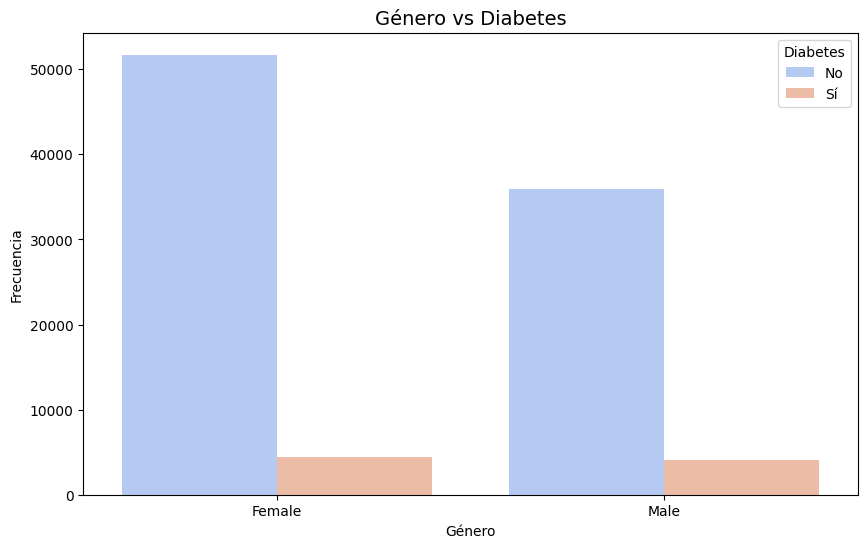

In [ ]:
# Gráfico de conteo: Género vs Diabetes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', hue='diabetes', palette='coolwarm')
plt.title('Género vs Diabetes', fontsize=14)
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.legend(title='Diabetes', labels=['No', 'Sí'])
plt.show()

En el gráfico se ve que hay más mujeres que hombres en la muestra, por lo que el conjunto está desbalanceado. Aunque la cantidad total de casos positivos parece parecida entre géneros, al mirar la proporción dentro de cada grupo, los hombres tienen una prevalencia un poco mayor de diabetes.

### 5.4. Nivel de HbA1c vs Diabetes

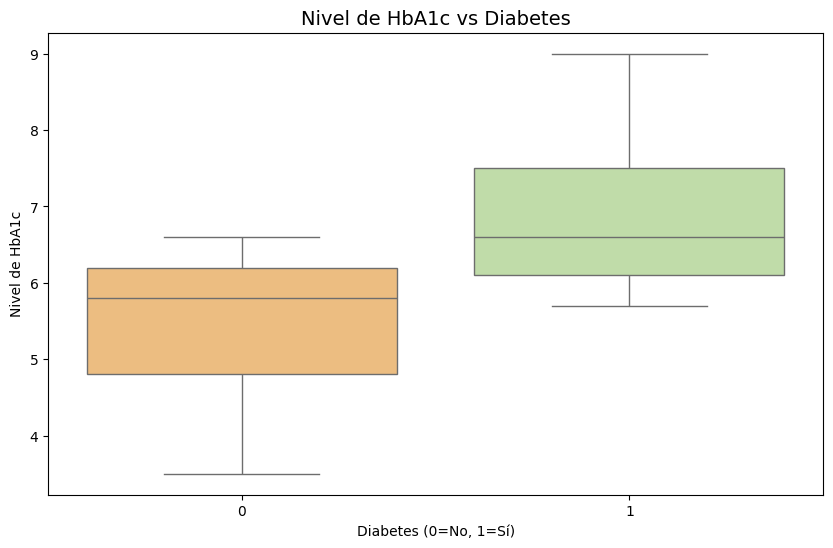

In [ ]:
# Boxplot: HbA1c vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', palette='Spectral')
plt.title('Nivel de HbA1c vs Diabetes', fontsize=14)
plt.xlabel('Diabetes (0=No, 1=Sí)')
plt.ylabel('Nivel de HbA1c')
plt.show()

la mediana de HbA1c es más alta en el grupo diabético. Mientras que quienes no tienen diabetes rondan valores entre 5 y 6%, las personas diabéticas muestran valores típicos entre 6.5 y 8%, incluso alcanzando niveles cercanos al 9%.

Conclusión → El gráfico muestra una diferencia clara en los niveles de HbA1c: las personas con diabetes presentan valores significativamente más altos, lo cual es coherente porque la HbA1c elevada es uno de los principales indicadores del diagnóstico de diabetes.

### 5.5. Nivel de glucosa en sangre vs Diabetes

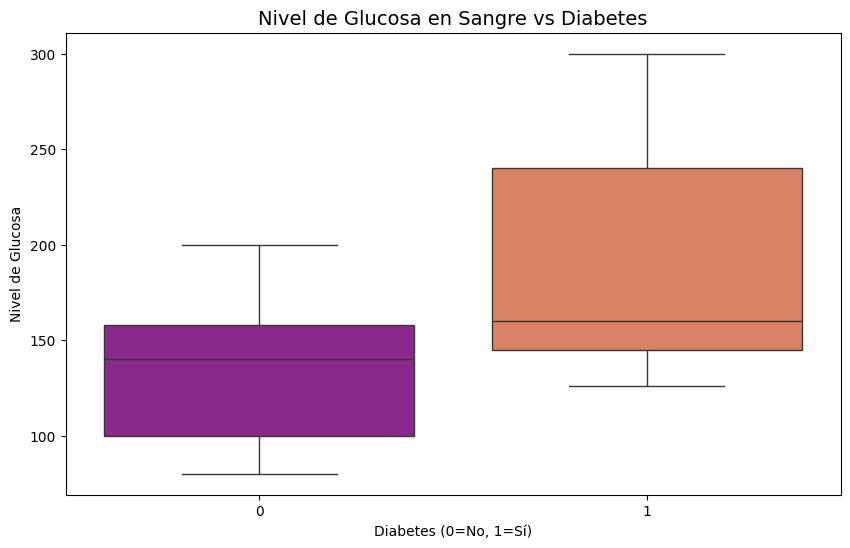

In [ ]:
# Boxplot: Glucosa vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', palette='plasma')
plt.title('Nivel de Glucosa en Sangre vs Diabetes', fontsize=14)
plt.xlabel('Diabetes (0=No, 1=Sí)')
plt.ylabel('Nivel de Glucosa')
plt.show()

En el grupo no diabético, los niveles de glucosa se concentran alrededor de 150 mg/dL, con valores que van aproximadamente de 80 a 200.

En el grupo diabético, la mediana es más alta y la distribución es más amplia: aparecen niveles entre 120 y casi 300 mg/dL, lo que muestra una variabilidad mucho mayor.

Conclusión → Las personas con diabetes presentan niveles de glucosa notablemente más altos y más variables. Esto es consistente con el hecho de que la glucosa elevada es un indicador directo del diagnóstico de diabetes.

## 6. Análisis Multivariado

### Matriz de gráficos de pares (Pairplot)

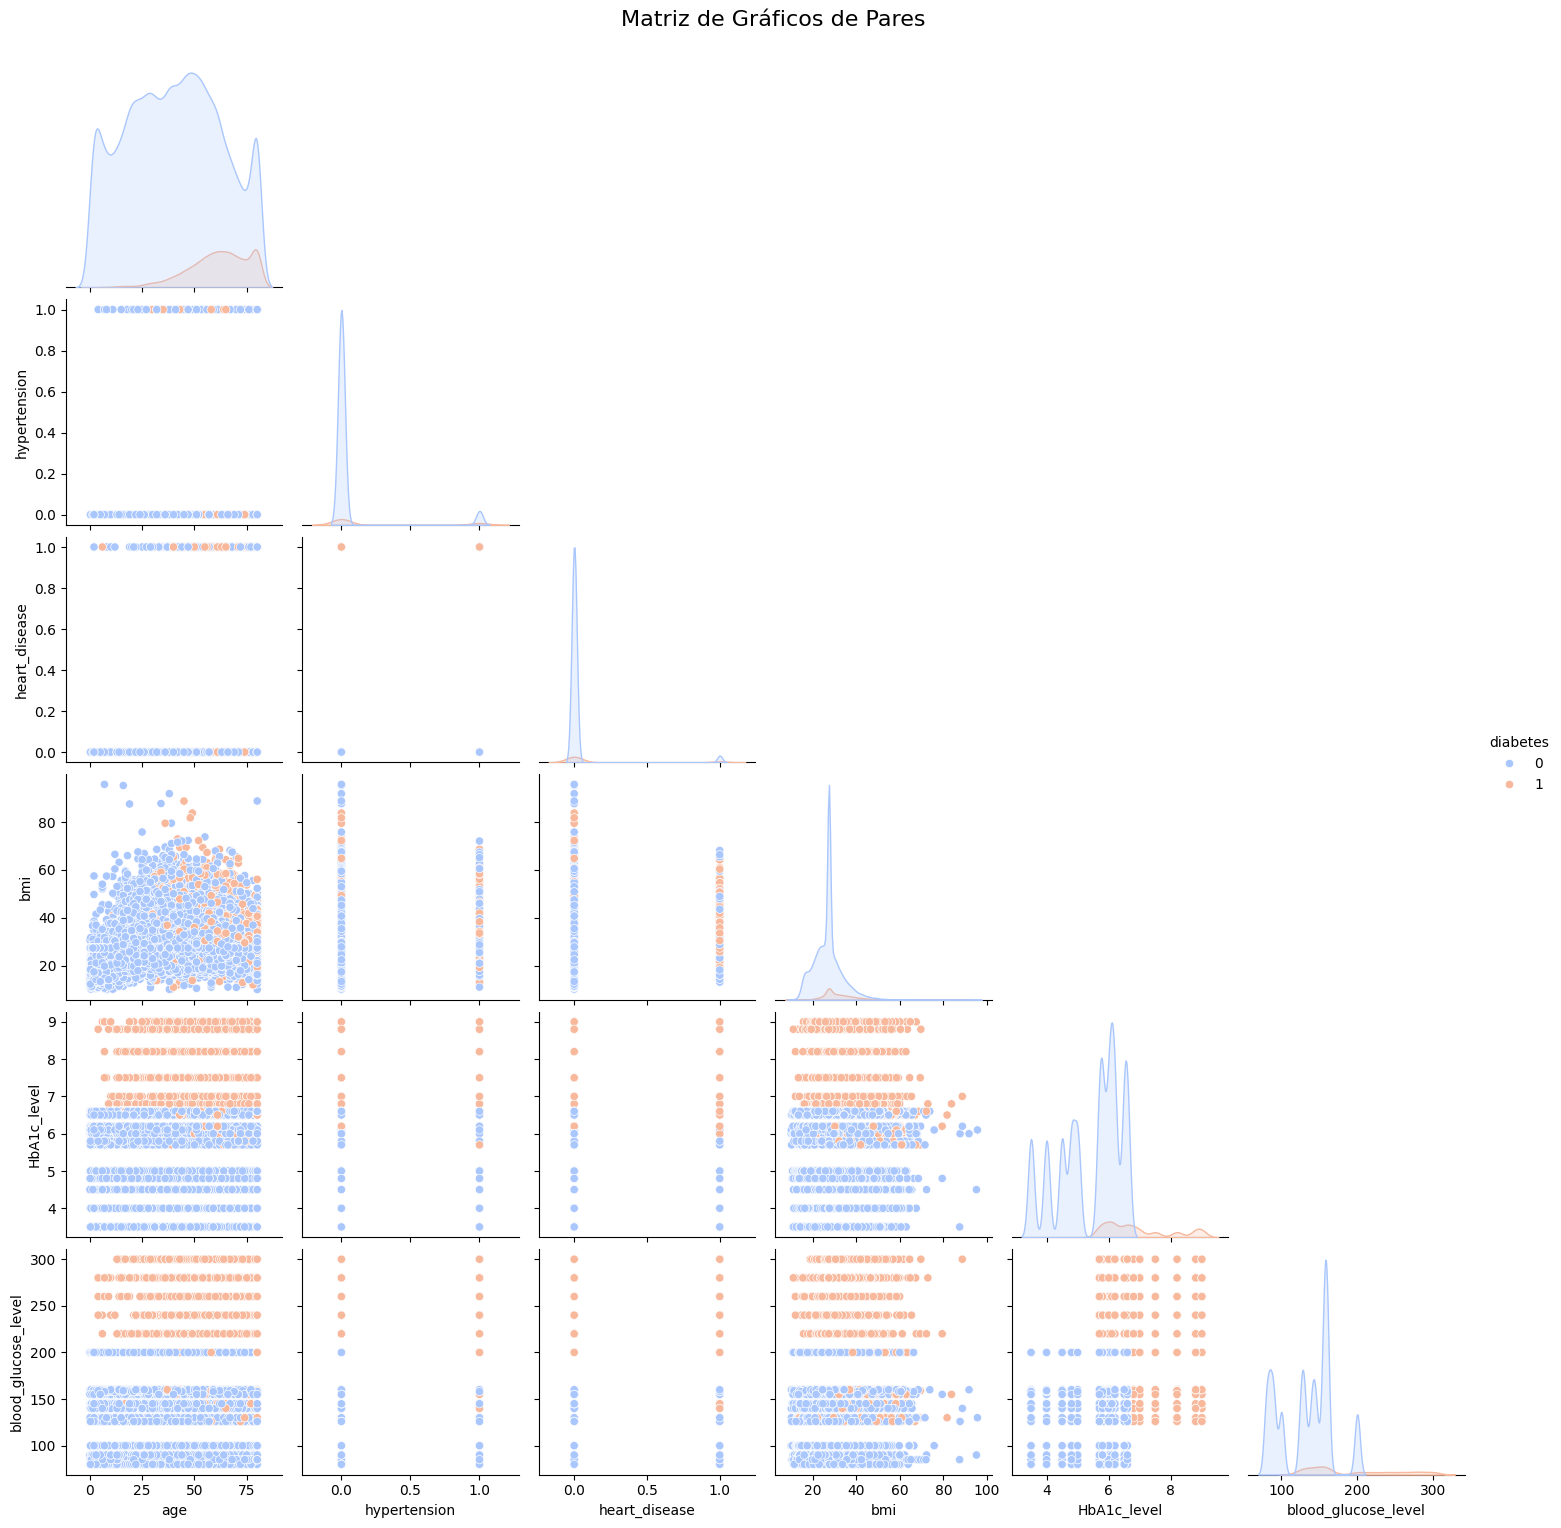

In [ ]:
# Pairplot para características numéricas
sns.pairplot(df, hue='diabetes', palette='coolwarm', diag_kind='kde', corner=True)
plt.suptitle('Matriz de Gráficos de Pares', y=1.02, fontsize=16)
plt.show()

Un pairplot muestra como se relaciona cada variable con todas las demas al mismo tiempo.

Algunas conclusiones que podemos observar de los graficos son:

* Relacion Edad-IMC-HbA1c-Glucosa:
    En cuanto a IMC vs Edad se observa una gran dispersion de puntos, no hay una separacion muy clara entre diabeticos y no diabeticos.
    En cambio en HbA1c y glucosa aparece una separacion mucho mas marcada, en donde los puntos naranjas (diabeticos) se concentran en valores mas altos y mientras que los celestes (no diabeticos) se concentran en valores mas bajos. Lo cual confirma que dichas variables son las mas informativas para distinguir casos de diabetes

Podemos observar dos tipos de graficos un grafico de puntos y otro de densidad.

Los graficos de puntos muestran la relacion entre dos variables numericas. Nos sirve para analizar si existe alfuna tendencia, agrupamiento o separacion entre los grupos.

Por otro lado los gráficos de densidad son una forma suave de ver la distribucion de una variable.


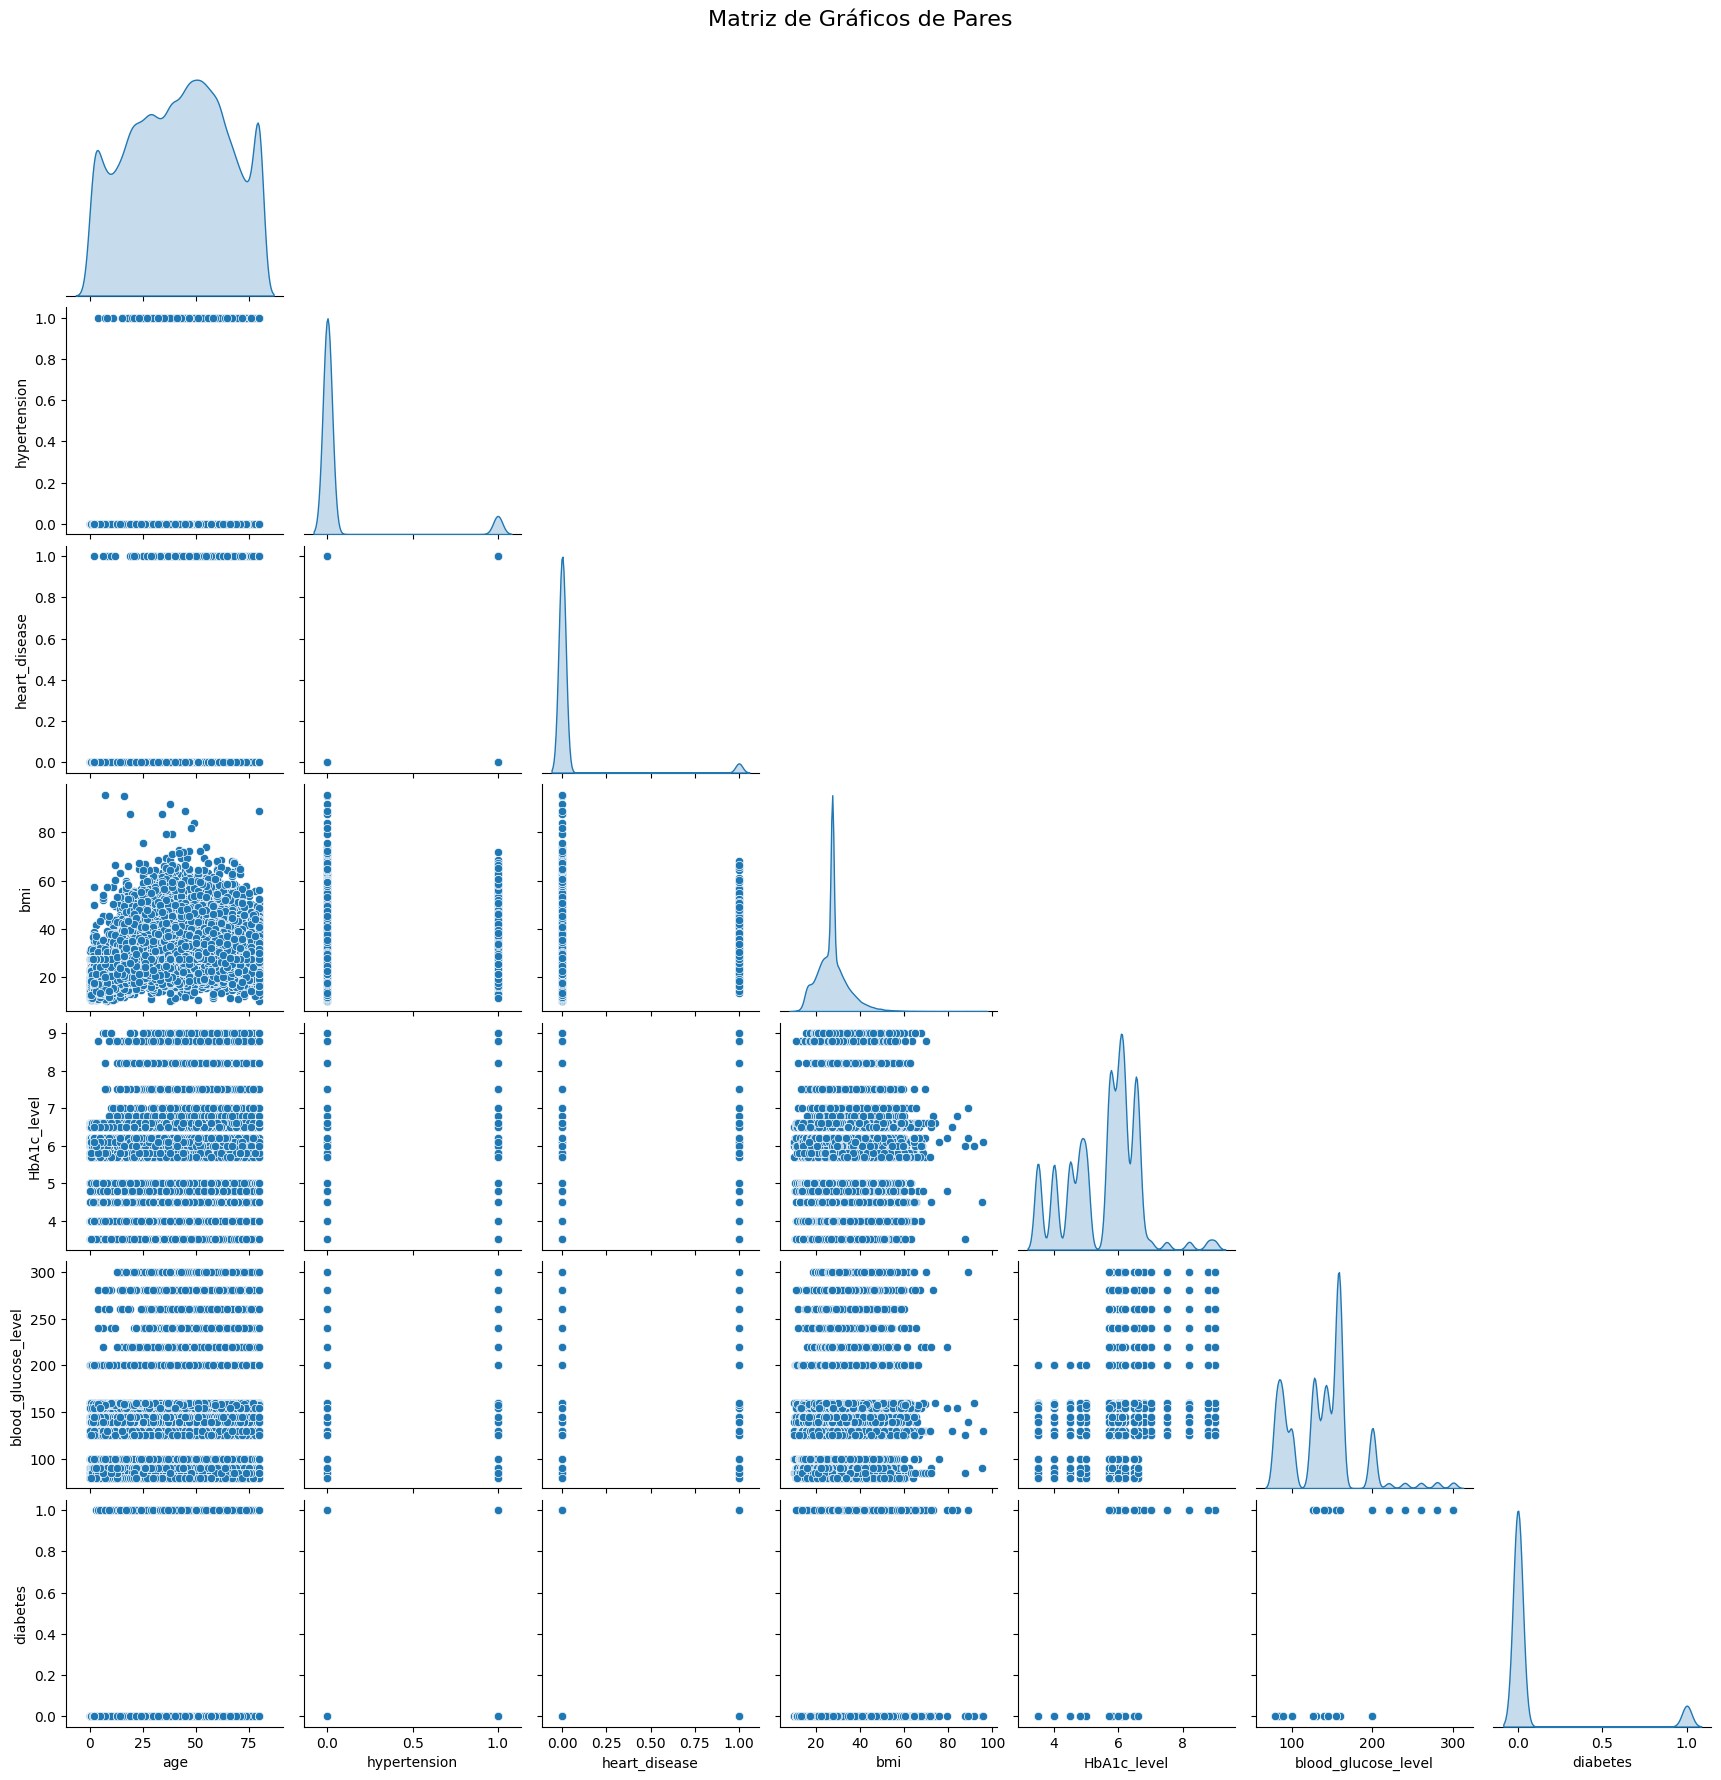

In [ ]:
# Pairplot para características numéricas
sns.pairplot(df, palette='coolwarm', diag_kind='kde', corner=True)
plt.suptitle('Matriz de Gráficos de Pares', y=1.02, fontsize=16)
plt.show()

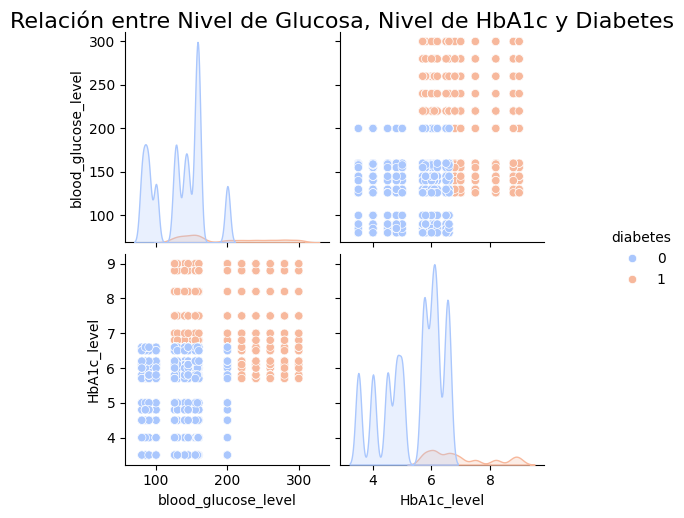

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes
variables_a_graficar = ['blood_glucose_level', 'HbA1c_level', 'diabetes']
df_subset = df[variables_a_graficar]

# Generar el pairplot
sns.pairplot(df_subset, hue='diabetes', palette='coolwarm', diag_kind='kde')
plt.suptitle('Relación entre Nivel de Glucosa, Nivel de HbA1c y Diabetes', y=1.02, fontsize=16)
plt.show()

## 7. IMPLEMENTACION DE MËTODOS

### Preparación de datos


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Crear copia para análisis de correlación
data_corr = df.copy()

# One-hot encoding para género
data_corr = pd.get_dummies(data_corr, columns=['gender'], prefix='genero', drop_first=True)
if 'genero_Other' in data_corr.columns:
    data_corr = data_corr.drop('genero_Other', axis=1)

# Mapa según impacto
mapa_fumador = {
    'No Info': -1,      # Sin información
    'never': 0,         # Nunca
    'former': 1,        # Ex-fumador
    'not current': 2,   # No fuma actualmente
    'ever': 3,          # Alguna vez (historial indefinido)
    'current': 4        # Fumador actual
}

# Aplicamos el mapeo. Esto reemplaza el texto por los números.
data_corr['smoking_history'] = data_corr['smoking_history'].map(mapa_fumador)

# Variables predictoras (todas menos la target)
X = data_corr.drop('diabetes', axis=1)

# Target
y = data_corr['diabetes']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()

# Escalamos (esto devuelve numpy arrays sin nombres)
X_train_scaled_array = scaler.fit_transform(X_train)
X_test_scaled_array = scaler.transform(X_test)

# Volvemos a convertir en DataFrame para no perder los nombres de las columnas
# Esto es vital para que luego puedas graficar importance/coeficientes fácilmente
X_train = pd.DataFrame(X_train_scaled_array, columns=X.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled_array, columns=X.columns, index=X_test.index)
print("Columnas finales:", X_train.columns.tolist())

Columnas finales: ['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'genero_Male']


### Regresion Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 0.05243574867347601
R²: 0.348087327007617


Obtuvimos un MSE (error cuadratico medio) de 0.0524. Cuanto mas pequeño es el MSE, mejor se ajusta el modelo a los datos. En nuestro caso el MSE refleja que tan lejos estan los valores predichos de los verdaderos 0 o 1.

El $R^2$ es de 0.348 (35%). Mide la proporcion de la variabilidad de la variable objetivo que el modelo logra explicar con las variables predictoras.

En nuestro caso $R^2$ es cercano a 0 lo cual indica que la **Regresion Lineal** no logra explicar bien la presencia de la diabetes (Lo cual es lo esperable, porque la regresion lineal no es el mejor modelos para una variable binaria)


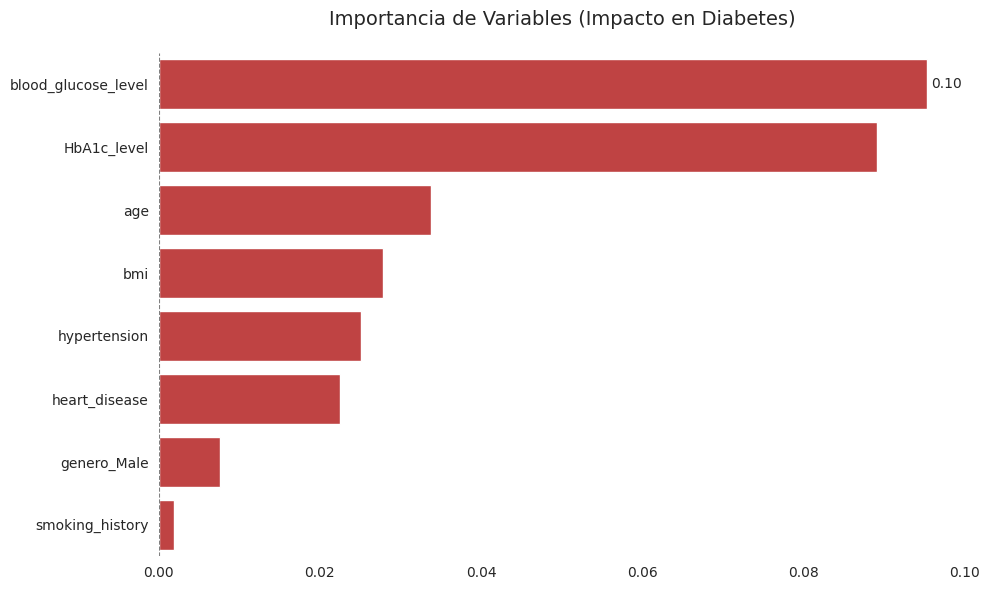

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparar datos (Agregamos .flatten() por seguridad si usas LogisticRegression)
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_.flatten()
})

# 3. Ordenar por magnitud (opcional: ayuda a ver los más impactantes arriba)
# Si prefieres ver positivos arriba y negativos abajo:
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# 4. Configurar el estilo visual (Más limpio)
sns.set_style("white") # Fondo blanco sin cuadrícula pesada
plt.figure(figsize=(10, 6))

# Asignar colores (Rojo para positivo, Azul para negativo, tonos más suaves)
colores = ['#d32f2f' if x > 0 else '#1976d2' for x in coef_df['Coeficiente']]

# 5. Graficar
ax = sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette=colores)

# 6. Limpieza visual "Minimalista"
sns.despine(left=True, bottom=True) # Quita los bordes del cuadro
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--') # Línea cero sutil
plt.xlabel('') # A veces el label del eje X sobra si el título es claro
plt.ylabel('') # El label del eje Y sobra porque ya se leen las variables

# 7. Poner valores automáticamente (Mucho más limpio que el loop manual)
# fmt='%.2f' redondea a 2 decimales. padding da un respiro al texto.
ax.bar_label(ax.containers[0], fmt='%.2f', padding=3, fontsize=10)

plt.title('Importancia de Variables (Impacto en Diabetes)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

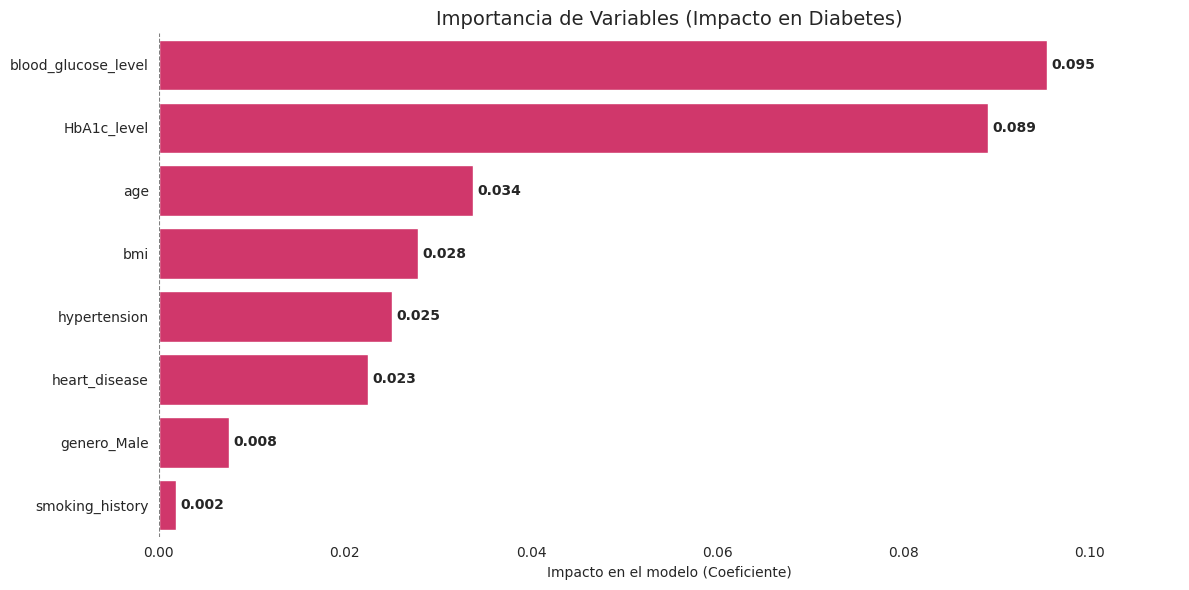

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparar datos (Simulados para el ejemplo)
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_.flatten()
})

# 2. Ordenar por magnitud
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# 3. Estilo
sns.set_style("white")
plt.figure(figsize=(12, 6))

# 4. Colores
colores = ['#e91e63' if x > 0 else '#1976d2' for x in coef_df['Coeficiente']]

# 5. Graficar
ax = sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette=colores)


# En lugar de solo containers[0], recorremos TODOS los containers.
# Esto asegura que si Seaborn separa las barras, todas reciban su etiqueta.
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=10, fontweight='bold')

# 6. Ajustes finales
sns.despine(left=True, bottom=True)
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')
plt.xlabel('Impacto en el modelo (Coeficiente)')
plt.ylabel('')
plt.title('Importancia de Variables (Impacto en Diabetes)', fontsize=14)

# 7. TRUCO EXTRA: Dar espacio a la derecha
# Multiplicamos el valor máximo por 1.15 para dar un 15% de aire extra a la derecha.
# Así el número "0.095" no quedará pegado al borde del cuadro.
max_val = coef_df['Coeficiente'].max()
plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

Si bien, es cierto que algunos datos no tienen sentido (por ejemplo, que ser fumador actual, disminuye la probabilidad de tener diabetes), esto se debe a que esta variable se pondera con muchas otras que tienen mucho mas impacto. Además, por lo general, los fumadores actuales, tienen menos peso (imc), pues suprime el apetito y esta variable tiene mucho mas impacto. Otra cosa que puede afectar y es muy importante, es porque la regresión lineal no es buena para este tipo de datasets en los cuales el modelo debe predecir si pertenece a una clase o no (0 o 1)


**Regresion Lineal**

Comencemos por explicar que siginifican los valores a la derecha de las barras, estos valores son los coeficientes que dicen cuanto cambia la prediccion su aumentamos esa variable en 1 unidad (asumiendo que todo lo demas se mantiene estable/igual). Estos coeficientes son calculados por LinearRegression cuando ejecutamos el comando .fit().

Para entender un poco mas, tenemos que saber que la regresion lineal es simplemente una suma ponderada por ejemplo:

prediccion = coef1 * var1 + coef2 * var2+ ... + coefx * varx + base

* Se multiplican porque el coeficiente es el peso o importancia que se le da a cada unidad de esa variable.

*Consideraciones:* El algortimo en LinearRegression busca el menor error posible (minimos cuadrados)

**Explicacion Del Grafico**

El gráfico muestra los coeficientes de la ecuación lineal. Indican cuánto "suma" cada variable al valor final predicho (tendencia a diabetes) manteniéndose las demás constantes.

* Mayor Impacto:
  * blood_glucose_level: Coeficiente 0.095. Es la variable dominante con la pendiente más pronunciada. En una regresión lineal, esto indica que pequeños cambios en la glucosa disparan el valor de la predicción hacia arriba más rápido que cualquier otro factor.

  * HbA1c_level: Coeficiente 0.089. Le sigue muy de cerca. Al igual que la glucosa, este marcador sanguíneo tiene un peso casi decisivo en la ecuación de la recta.
* Variables fisicas:
  * age: Coeficiente 0.034. Tercer lugar en importancia. El modelo lineal interpreta que la acumulación de años aumenta progresivamente el "score" de riesgo, aunque con una pendiente mucho más suave que la glucosa.

  * bmi: Coeficiente 0.028. El peso corporal contribuye positivamente a la predicción, pero su aporte individual es aproximadamente un tercio del aporte de la glucosa.
* Variables de menor impacto:
  * genero_Male: Coeficiente 0.008. El impacto es mínimo. La recta apenas se inclina al cambiar el género.

  * smoking_history: Coeficiente 0.002. Matemáticamente irrelevante en esta ecuación. El hecho de fumar o no fumar apenas modifica el resultado numérico final.


**Conclusiones**

Los valores clínicos medibles como glucosa y HbA1c son los verdaderos motores del modelo, ya que su variabilidad permite que el coeficiente se amplifique. Las condiciones cardiovasculares como hipertensión y enfermedad cardíaca refuerzan la tendencia, mostrando una clara comorbilidad. En cambio, el género y el tabaquismo tienen un rol secundario en esta predicción.

El modelo se comporta de forma lógica: todos los factores conocidos de riesgo tienen coeficientes positivos. Sin embargo, al tratarse de una variable binaria (diabetes sí/no), sería más adecuado utilizar modelos no lineales como regresión logística o árboles de decisión, que capturan mejor los umbrales clínicos y permiten una clasificación más precisa.

### Otro métodos

Antes de realizar la implementacion explicaremos porque realizaremos Regresion Logistica:

Utilizamos Regresion Logistica porque la variable objetivo solo puede tomar valores 0 (no tiene diabetes) y 1 (Si tiene diabetes)

La curva logistica convierte cualquier combinación lineal de tus variables en una probabilidad real entre 0 y 1

De una curva logisitica obtenemos 3 cosas importantes:

1) probabilidad de diabetes
2) Coeficientes
3) Exactitud.

### Regresion Logisitica

La regresión logística es un método estadístico utilizado para modelar la relación entre un conjunto de variables independientes y una variable dependiente binaria. A diferencia de la regresión lineal, cuyo resultado puede asumir cualquier valor real, la regresión logística transforma la combinación lineal de las variables en una probabilidad comprendida entre 0 y 1 mediante la función sigmoide.
Esta función, definida como:

      σ(z) = 1/(1 + e^{-z})

recibe como entrada una expresión lineal de la forma
     
     z = β₀ + β₁x₁ + β₂x₂ + … + βₙxₙ

donde los coeficientes β representan la contribución de cada variable al resultado. De esta manera, el modelo no predice directamente la clase, sino la probabilidad de que el caso observado pertenezca al grupo positivo.

El proceso de ajuste del modelo consiste en estimar los coeficientes que mejor expliquen la relación entre las variables empleando técnicas de optimización. Para ello se utiliza la función de pérdida conocida como log-loss o entropía cruzada, que cuantifica el error entre las probabilidades predichas y los valores reales. Los coeficientes se actualizan iterativamente, generalmente mediante gradiente descendente, para minimizar esta pérdida.
Una vez entrenado, el modelo ofrece una interpretación directa de la influencia de cada variable a través del signo y la magnitud de los coeficientes: un coeficiente positivo implica que valores mayores de esa variable incrementan la probabilidad del evento, mientras que un coeficiente negativo indica el efecto contrario. Esta característica hace que la regresión logística sea especialmente útil en análisis exploratorios, ya que permite evaluar qué variables presentan mayor asociación con el fenómeno de interés y en qué sentido lo afectan.

En el contexto del proyecto, la regresión logística permite estudiar cómo cada indicador clínico se relaciona con la presencia o ausencia de diabetes sin necesidad de construir un sistema predictivo final. Su aporte principal radica en que proporciona un marco matemático para cuantificar la influencia relativa de las variables y observar tendencias generales dentro del conjunto de datos, respetando el carácter binario de la variable objetivo.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("=== Regresión Logística ===")
print(classification_report(y_test, y_pred_log))


=== Regresión Logística ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     21912
           1       0.84      0.63      0.72      2120

    accuracy                           0.96     24032
   macro avg       0.90      0.81      0.85     24032
weighted avg       0.95      0.96      0.95     24032



#### Matriz de confusion

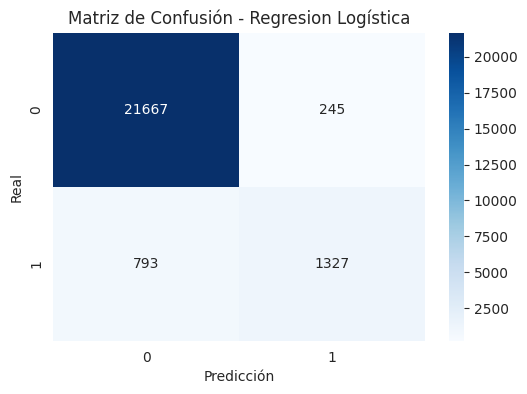

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresion Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

#### Importancia de variables

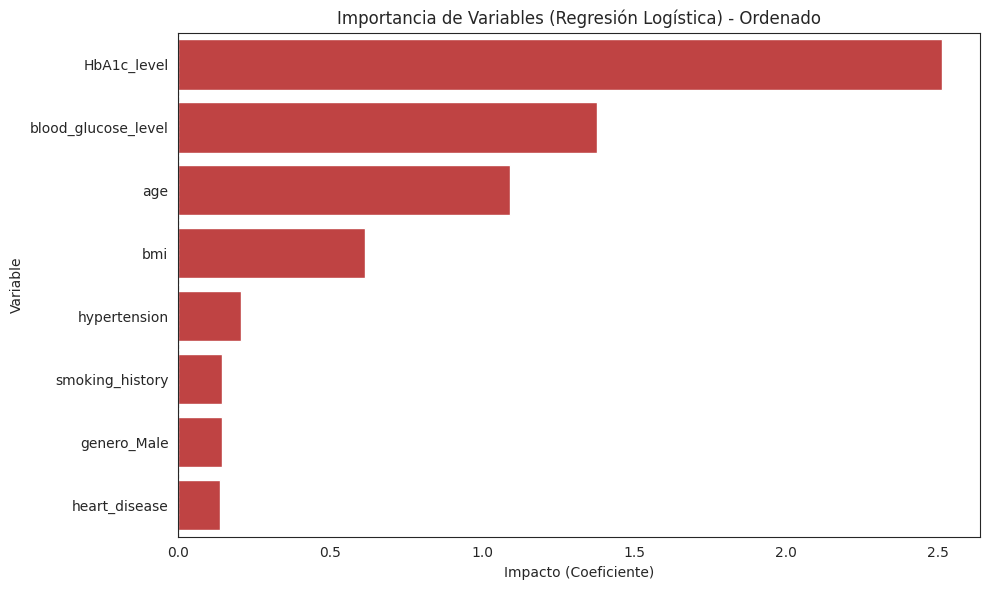

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

coefs = log_model.coef_[0]
variables = X.columns

# 1. Crear DataFrame
df_coefs = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coefs
})

# 2. Ordenar de mayor a menor (Positivos arriba, Negativos abajo)
df_coefs = df_coefs.sort_values(by='Coeficiente', ascending=False)

# 3. Configurar colores (Rojo para riesgo, Azul para protección)
colores = ['#d32f2f' if x > 0 else '#1976d2' for x in df_coefs['Coeficiente']]

# 4. Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variable', data=df_coefs, palette=colores)

plt.title("Importancia de Variables (Regresión Logística) - Ordenado")
plt.xlabel("Impacto (Coeficiente)")
plt.axvline(0, color='black', linewidth=0.8, linestyle='--') # Agrega una línea en el 0
plt.tight_layout()
plt.show()

### Random Forest

Random Forest es un modelo más complejo basado en muchos árboles de decisión que votan la clase final.
Cada árbol aprende de una parte distinta del dataset, por lo que el resultado es más robusto y preciso.
Lo que hace resumidamente, es generar una serie de árboles de decisión, utilizando subconjuntos de datos del conjunto original.

### Funcionamiento
El algoritmo Random Forest construye múltiples árboles de decisión independientes, entrenando cada uno con una muestra aleatoria de tus datos. A diferencia de un árbol normal, en cada nodo elige solo un subconjunto de variables al azar para encontrar la mejor división, lo que garantiza diversidad en el modelo. Para predecir, pasa los datos del paciente por todos los árboles y define el diagnóstico final por votación de la mayoría. Su precisión se estima internamente con los datos que quedaron fuera del entrenamiento ("out-of-bag"), y aunque el algoritmo tiene una configuración estándar, un analista puede afinar manualmente parámetros (como la cantidad de variables por nodo) para optimizar el rendimiento.

### Porque es más acorde para nuestro problema que regresión lineal?
Usar Regresión Lineal para este problema es técnicamente inadecuado porque está diseñada para predecir números infinitos (como precios o temperaturas), por lo que arrojaría resultados ilógicos como "tienes 1.5 de diabetes" o probabilidades negativas. El Random Forest es infinitamente más útil aquí porque es un algoritmo de clasificación nativo: entiende que la respuesta debe ser una categoría (Sí/No) y modela perfectamente las reglas médicas estrictas ("si glucosa > X"), algo que una simple línea recta matemática no puede capturar.

### Características principales:

* Captura relaciones no lineales y complejas entre variables.
* Resistente a outliers y datos ruidosos.
* Tiene mejor desempeño general en datasets grandes y heterogéneos.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21912
           1       0.95      0.69      0.80      2120

    accuracy                           0.97     24032
   macro avg       0.96      0.84      0.89     24032
weighted avg       0.97      0.97      0.97     24032



En este código, generamos los árboles de decisión con nuestro subconjunto de datos de entrenamiento (Xtrain), que cabe aclarar que es el mismo para todos los modelos. Establecemos que se establezcan 200 arboles de decision (n_estimators) y que cada vez que ejecutemos el código con el mismo codigo, los resultados sean los mismos para disminuir la aletoriedad (random_state=42). Finalmente calculamos las métricas con nuestro subconjunto de prueba que también es el mismo para todos los subconjuntos de datos. Y mostramos el reporte
El reporte, muestra 2 clases. Una la clase 1 (que si tienen diabetes) y otra clase 0 (que no tienen diabetes) y calcula las métricas para cada una de ellas (precisión, sensibilidad, etc.)
Luego, muestra ´métricas globales:
* Accuracy: Muestra la precisión, pero sin separar por clases.
* Macro avg: Muestra las métricas teniedo en cuenta que todas las clases importan lo mismo. Es decir, calcula el promedio entre los resultados de los que no tuvieron diabetes y los que si tuvieron diabetes promediando los resultados de la clase 0 y la clase 1.
* Weighted avg: Muestra las métricas pero ahora si le da importancia a la cantidad de gente de cada clase que se utilizo para testear. Como para nuestro conjunto de datos el porcentaje de las personas sanas (sin diabetes) es del 92%, las métricas de la clase 0 tendrán un peso de 0.92, mientras que de la clase 1 .0.08 únicamente.

### Conclusiones
- Vemos que el modelo es casi perfecto para predecir la gente sin diabetes, pues en el 97% de los casos, detecto que las personas estaban sanas cuando realmente lo estaban y solo el 3% de las veces, predijo que una persona tenia diabetes cuando en realidad no tenía. Además, el 100% de las veces, detecto a las personas sin diabetes. Que este valor sea alto es esperable, pues en nuestra muestra posee mucha mas gente sin diabetes que con diabetes, lo cual es compatible con lo que suele ocurrir en la realidad
- Para predecir gente con diabetes, los resultados fueron peores, aunque no dejaron de ser relativamente buenos. Vemos que el 93% de las veces acertó que una persona tenía diabetes cuando realmente tenía y solo el 7% de las veces predijo que una persona tenía diabetes cuando en realidad no tenía. Sin embargo, detecto solo el 69% de las personas sin diabetes. Es decir, un subconjunto bastante grande de personas con diabetes no fueron detectadas en base a las otras variables.

### Matriz de Confusion

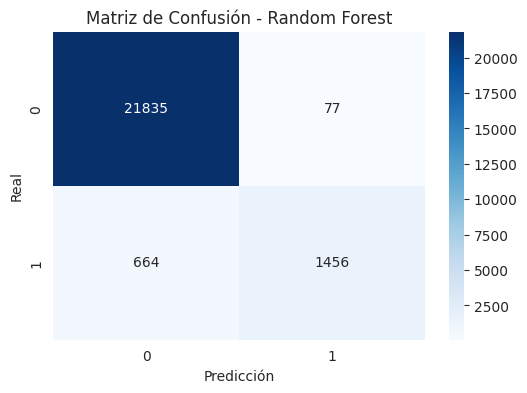

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


Esta es otra manera de visualizar los resultados anteriores. Vemos que el modelo:
* Predijo correctamente 21835 de un total de 21912 personas sanas (sin diabetes) e incorrectamente solo 77
* Predijo correctamente un total de 1456 de 2120 personas con diabetes pero predijo incorrectamente que 664 personas no tenían diabetes cuando en realidad si tenían

### Importancia de variables

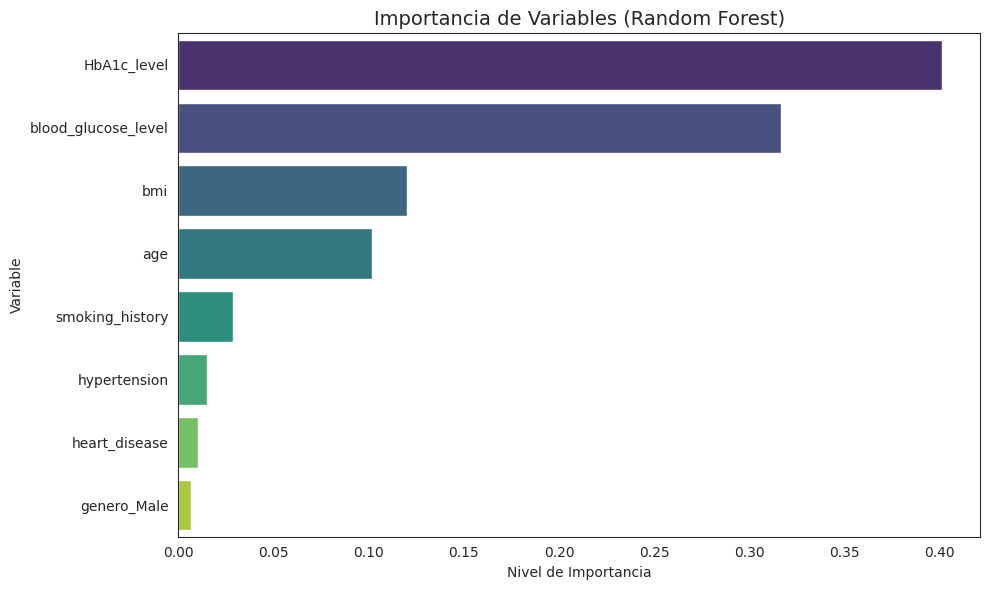

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes rf_model y X
importances = rf_model.feature_importances_
variables = X.columns

# 1. Crear un DataFrame temporal
# Esto une los nombres con sus valores para que no se desordenen al manipularlos
df_imp = pd.DataFrame({
    'Variable': variables,
    'Importancia': importances
})

# 2. Ordenar el DataFrame (Descendente)
df_imp = df_imp.sort_values(by='Importancia', ascending=False)

# 3. Graficar
plt.figure(figsize=(10, 6))

# Usamos 'data=df_imp' para que Seaborn respete el orden del DataFrame
sns.barplot(x='Importancia', y='Variable', data=df_imp, palette='viridis')

plt.title("Importancia de Variables (Random Forest)", fontsize=14)
plt.xlabel("Nivel de Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

A diferencia de Regresión logística, en donde se evalua si al aumentar una variable, aumenta la tendencia a tener diabetes o no tener diabetes, lo que se hace acá es evaluar el impacto de cada variable en la enfermedad en sí. Es por esto, que regresión logística tiene tanto valores positivos como negativos pero random forest solo admite valores positivos

## 8. Conclusiones del Análisis Exploratorio



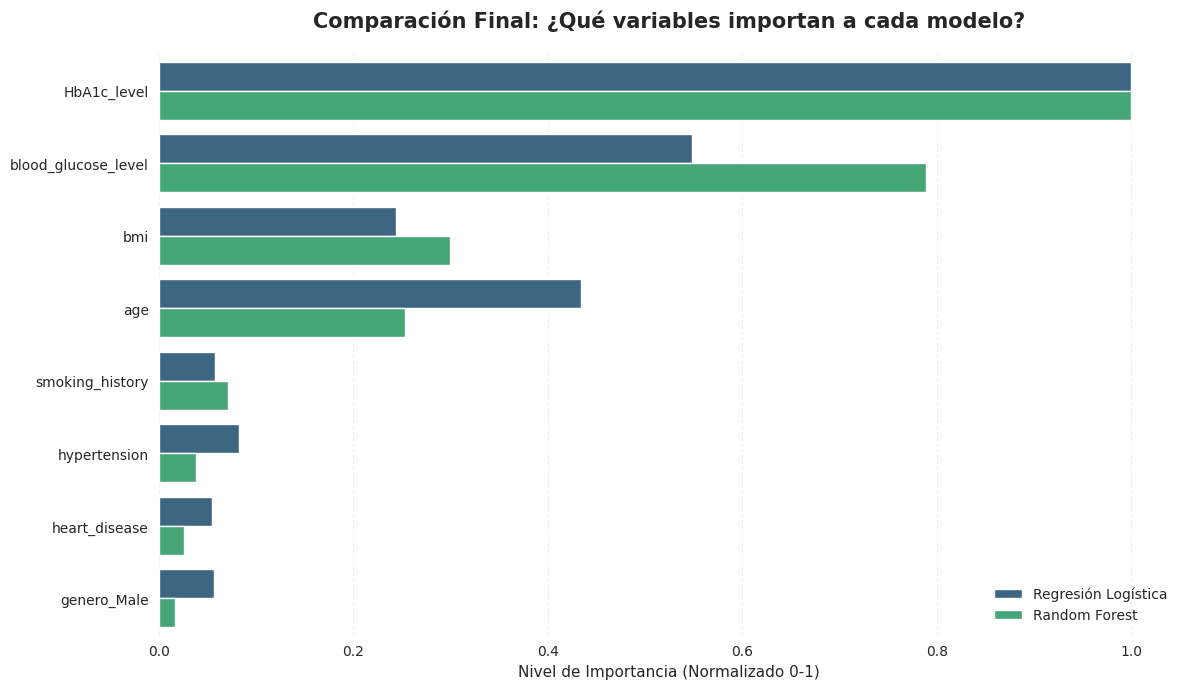

In [ ]:
nombres = X.columns
# Para comparar, llevamos todo a una escala de 0 a 1 (donde 1 es la variable más importante de ese modelo)

# A. Logistic Regression (Valor Absoluto)
imp_log = np.abs(log_model.coef_[0])
imp_log = imp_log / imp_log.max()

# B. Random Forest (Ya es positivo)
imp_rf = rf_model.feature_importances_
imp_rf = imp_rf / imp_rf.max()

# -----------------------------------------------------------------------------
# 3. PREPARAR DATAFRAME COMBINADO
# -----------------------------------------------------------------------------
df_compare = pd.DataFrame({
    'Variable': nombres,
    'Regresión Logística': imp_log,
    'Random Forest': imp_rf
})

# Filtrar 'Other' si existe para limpiar el gráfico
df_compare = df_compare[~df_compare['Variable'].str.contains('Other', case=False)]

# Transformar a formato largo para Seaborn (Melt)
df_melted = df_compare.melt(id_vars='Variable', var_name='Modelo', value_name='Importancia Relativa')

# Ordenar visualmente según lo que diga Random Forest (suele ser el más sensato)
orden = df_compare.sort_values(by='Random Forest', ascending=False)['Variable']

# -----------------------------------------------------------------------------
# 4. GRAFICAR (Estilo Unificado)
# -----------------------------------------------------------------------------
plt.figure(figsize=(12, 7))
sns.set_style("white") # Estilo limpio

# Graficar con barras agrupadas (hue)
ax = sns.barplot(x='Importancia Relativa', y='Variable', hue='Modelo', data=df_melted,
            order=orden, palette='viridis')

# Limpieza Visual (Minimalismo)
sns.despine(left=True, bottom=True)
plt.xlabel('Nivel de Importancia (Normalizado 0-1)', fontsize=11)
plt.ylabel('')
plt.title('Comparación Final: ¿Qué variables importan a cada modelo?', fontsize=15, fontweight='bold', pad=20)
plt.legend(title=None, frameon=False, loc='lower right') # Leyenda limpia

# Opcional: Líneas verticales suaves para guiar la vista
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


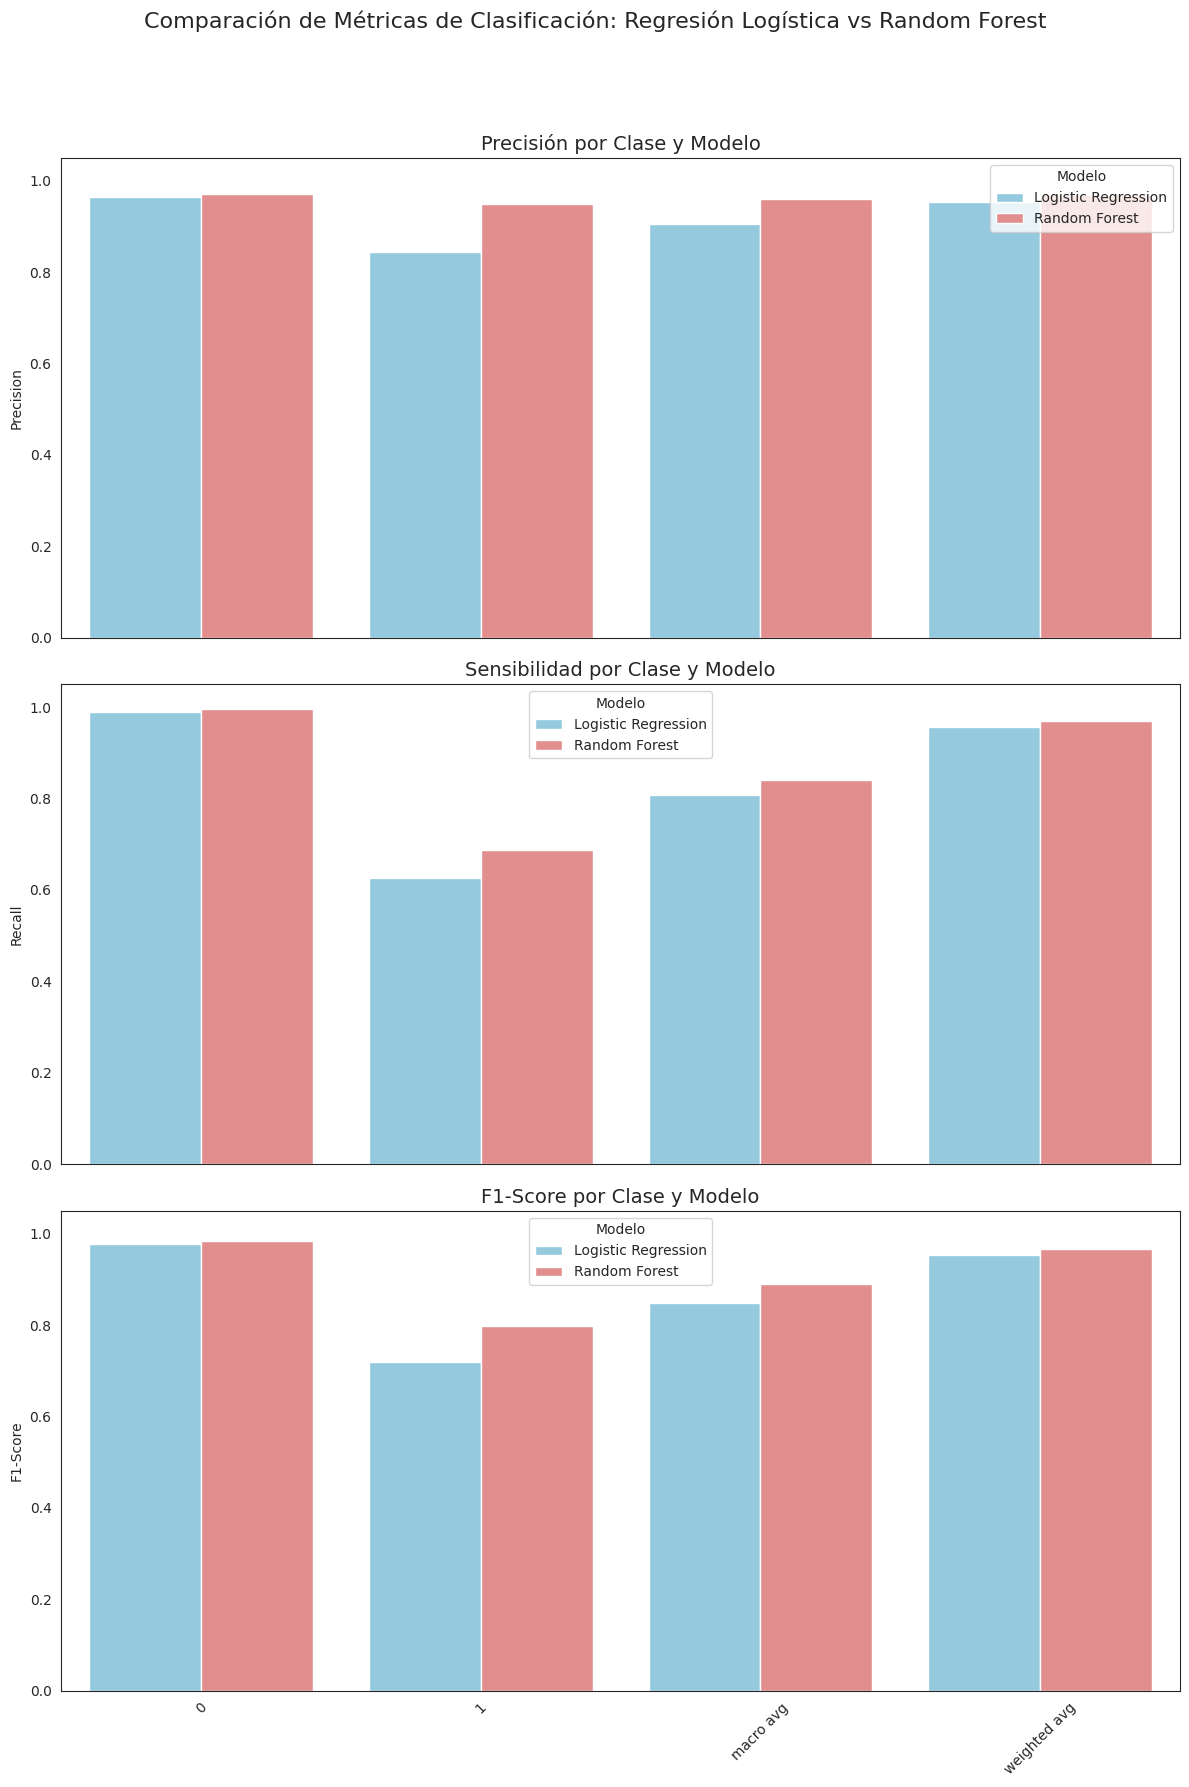


=== Reporte de Clasificación - Regresión Logística ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     21912
           1       0.84      0.63      0.72      2120

    accuracy                           0.96     24032
   macro avg       0.90      0.81      0.85     24032
weighted avg       0.95      0.96      0.95     24032


=== Reporte de Clasificación - Random Forest ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21912
           1       0.95      0.69      0.80      2120

    accuracy                           0.97     24032
   macro avg       0.96      0.84      0.89     24032
weighted avg       0.97      0.97      0.97     24032



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Ensure y_test, y_pred_log, y_pred_rf are available from previous cell executions
# If not, please run the preceding cells that define these variables.

# 3. Extract Classification Reports
def parse_classification_report_dict(report_dict, model_name):
    data = []
    for label in ['0', '1', 'macro avg', 'weighted avg']:
        if label in report_dict:
            metrics = report_dict[label]
            precision = metrics['precision']
            recall = metrics['recall']
            f1_score = metrics['f1-score']

            data.append({'Model': model_name, 'Metric': 'Precision', 'Value': precision, 'Category': label})
            data.append({'Model': model_name, 'Metric': 'Recall', 'Value': recall, 'Category': label})
            data.append({'Model': model_name, 'Metric': 'F1-Score', 'Value': f1_score, 'Category': label})
    return data

log_report_dict = classification_report(y_test, y_pred_log, output_dict=True)
rf_report_dict = classification_report(y_test, y_pred_rf, output_dict=True)

log_data = parse_classification_report_dict(log_report_dict, 'Logistic Regression')
rf_data = parse_classification_report_dict(rf_report_dict, 'Random Forest')

# Combine data for plotting
plot_df = pd.DataFrame(log_data + rf_data)

# 4. Generate the Plot

# Define a custom color palette
palette = {"Logistic Regression": "skyblue", "Random Forest": "lightcoral"}

fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
metrics = ['Precision', 'Recall', 'F1-Score']
titles = ['Precisión', 'Sensibilidad', 'F1-Score'] # Spanish titles

for i, metric in enumerate(metrics):
    sns.barplot(
        data=plot_df[plot_df['Metric'] == metric],
        x='Category',
        y='Value',
        hue='Model',
        palette=palette,
        ax=axes[i],
        errorbar=None # Remove error bars for clarity on classification report metrics
    )
    axes[i].set_title(f'{titles[i]} por Clase y Modelo', fontsize=14)
    axes[i].set_xlabel('') # Remove x-label, it's shared across subplots
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1.05) # Metrics are between 0 and 1
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Modelo')

plt.suptitle('Comparación de Métricas de Clasificación: Regresión Logística vs Random Forest', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

# Print full classification reports for reference
print("\n=== Reporte de Clasificación - Regresión Logística ===")
print(classification_report(y_test, y_pred_log))
print("\n=== Reporte de Clasificación - Random Forest ===")
print(classification_report(y_test, y_pred_rf))

 ### Principales hallazgos:

1. **Variables más correlacionadas con diabetes:**
   - Nivel de HbA1c (hemoglobina glucosilada)
   - Nivel de glucosa en sangre
   - Edad
   - IMC (Índice de Masa Corporal)

2. **Distribución de diabetes:**
   - El dataset está desbalanceado con solo aproximadamente 9% de casos positivos
   - La población analizada suele tener un IMC alto y por lo general edades más avanzadas

3. **Patrones observados:**
   - Las personas con diabetes tienden a tener niveles más altos de HbA1c y glucosa
   - La edad y el IMC muestran diferencias entre personas con y sin diabetes
   - Algunas variables (género, historial de fumadores) muestran correlaciones bajas, es decir, poco impacto en el padecimiento de la diabetes

Este análisis proporciona una base sólida para comprender los factores relacionados con la diabetes.